# Capstone 1: StarCraft 2 Dataset

Due to the exploratory nature of this section, there are many graphs that did not make it to publishing. They were used to assess possible outliers.

In [1]:
#import necessary packages
import pandas as pd
import numpy as py
import matplotlib.pyplot as plt

In [2]:
#import in data, look at the head
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00272/SkillCraft1_Dataset.csv'

base = pd.read_csv(url)

## Convert Column Data Types

In [3]:
# Describe
base.describe()

,GameID,LeagueIndex,APM,SelectByHotkeys,AssignToHotkeys,UniqueHotkeys,MinimapAttacks,MinimapRightClicks,NumberOfPACs,GapBetweenPACs,ActionLatency,ActionsInPAC,TotalMapExplored,WorkersMade,UniqueUnitsMade,ComplexUnitsMade,ComplexAbilitiesUsed
count,3395.000000,3395.000000,3395.000000,3395.000000,3395.000000,3395.000000,3395.000000,3395.000000,3395.000000,3395.000000,3395.000000,3395.000000,3395.000000,3395.000000,3395.000000,3395.000000,3395.000000
mean,4805.012371,4.184094,117.046947,0.004299,0.000374,4.364654,0.000098,0.000387,0.003463,40.361562,63.739403,5.272988,22.131664,0.001032,6.534021,0.000059,0.000142
std,2719.944851,1.517327,51.945291,0.005284,0.000225,2.360333,0.000166,0.000377,0.000992,17.153570,19.238869,1.494835,7.431719,0.000519,1.857697,0.000111,0.000265
min,52.000000,1.000000,22.059600,0.000000,0.000000,0.000000,0.000000,0.000000,0.000679,6.666700,24.093600,2.038900,5.000000,0.000077,2.000000,0.000000,0.000000
25%,2464.500000,3.000000,79.900200,0.001258,0.000204,3.000000,0.000000,0.000140,0.002754,28.957750,50.446600,4.272850,17.000000,0.000683,5.000000,0.000000,0.000000
50%,4874.000000,4.000000,108.010200,0.002500,0.000353,4.000000,0.000040,0.000281,0.003395,36.723500,60.931800,5.095500,22.000000,0.000905,6.000000,0.000000,0.000020
75%,7108.500000,5.000000,142.790400,0.005133,0.000499,6.000000,0.000119,0.000514,0.004027,48.290500,73.681300,6.033600,27.000000,0.001259,8.000000,0.000086,0.000181
max,10095.000000,8.000000,389.831400,0.043088,0.001752,10.000000,0.003019,0.004041,0.007971,237.142900,176.372100,18.558100,58.000000,0.005149,13.000000,0.000902,0.003084


In [4]:
base.columns

Index(['GameID', 'LeagueIndex', 'Age', 'HoursPerWeek', 'TotalHours', 'APM',
       'SelectByHotkeys', 'AssignToHotkeys', 'UniqueHotkeys', 'MinimapAttacks',
       'MinimapRightClicks', 'NumberOfPACs', 'GapBetweenPACs', 'ActionLatency',
       'ActionsInPAC', 'TotalMapExplored', 'WorkersMade', 'UniqueUnitsMade',
       'ComplexUnitsMade', 'ComplexAbilitiesUsed'],
      dtype='object')

In [5]:
base.dtypes

GameID                    int64
LeagueIndex               int64
Age                      object
HoursPerWeek             object
TotalHours               object
APM                     float64
SelectByHotkeys         float64
AssignToHotkeys         float64
UniqueHotkeys             int64
MinimapAttacks          float64
MinimapRightClicks      float64
NumberOfPACs            float64
GapBetweenPACs          float64
ActionLatency           float64
ActionsInPAC            float64
TotalMapExplored          int64
WorkersMade             float64
UniqueUnitsMade           int64
ComplexUnitsMade        float64
ComplexAbilitiesUsed    float64
dtype: object

In [6]:
#change the columns with numeric values to numeric (specifically Age,
# HoursPerWeek, and TotalHours)
base['Age']=pd.to_numeric(base['Age'], errors = 'coerce')
base['HoursPerWeek']=pd.to_numeric(base['HoursPerWeek'], errors = 'coerce')
base['TotalHours']=pd.to_numeric(base['TotalHours'], errors = 'coerce')
base.dtypes

GameID                    int64
LeagueIndex               int64
Age                     float64
HoursPerWeek            float64
TotalHours              float64
APM                     float64
SelectByHotkeys         float64
AssignToHotkeys         float64
UniqueHotkeys             int64
MinimapAttacks          float64
MinimapRightClicks      float64
NumberOfPACs            float64
GapBetweenPACs          float64
ActionLatency           float64
ActionsInPAC            float64
TotalMapExplored          int64
WorkersMade             float64
UniqueUnitsMade           int64
ComplexUnitsMade        float64
ComplexAbilitiesUsed    float64
dtype: object

In [7]:
#describe again
base.describe()

,GameID,LeagueIndex,Age,HoursPerWeek,TotalHours,APM,SelectByHotkeys,AssignToHotkeys,UniqueHotkeys,MinimapAttacks,MinimapRightClicks,NumberOfPACs,GapBetweenPACs,ActionLatency,ActionsInPAC,TotalMapExplored,WorkersMade,UniqueUnitsMade,ComplexUnitsMade,ComplexAbilitiesUsed
count,3395.000000,3395.000000,3340.000000,3339.000000,3338.000000,3395.000000,3395.000000,3395.000000,3395.000000,3395.000000,3395.000000,3395.000000,3395.000000,3395.000000,3395.000000,3395.000000,3395.000000,3395.000000,3395.000000,3395.000000
mean,4805.012371,4.184094,21.647904,15.910752,960.421809,117.046947,0.004299,0.000374,4.364654,0.000098,0.000387,0.003463,40.361562,63.739403,5.272988,22.131664,0.001032,6.534021,0.000059,0.000142
std,2719.944851,1.517327,4.206341,11.962912,17318.133922,51.945291,0.005284,0.000225,2.360333,0.000166,0.000377,0.000992,17.153570,19.238869,1.494835,7.431719,0.000519,1.857697,0.000111,0.000265
min,52.000000,1.000000,16.000000,0.000000,3.000000,22.059600,0.000000,0.000000,0.000000,0.000000,0.000000,0.000679,6.666700,24.093600,2.038900,5.000000,0.000077,2.000000,0.000000,0.000000
25%,2464.500000,3.000000,19.000000,8.000000,300.000000,79.900200,0.001258,0.000204,3.000000,0.000000,0.000140,0.002754,28.957750,50.446600,4.272850,17.000000,0.000683,5.000000,0.000000,0.000000
50%,4874.000000,4.000000,21.000000,12.000000,500.000000,108.010200,0.002500,0.000353,4.000000,0.000040,0.000281,0.003395,36.723500,60.931800,5.095500,22.000000,0.000905,6.000000,0.000000,0.000020
75%,7108.500000,5.000000,24.000000,20.000000,800.000000,142.790400,0.005133,0.000499,6.000000,0.000119,0.000514,0.004027,48.290500,73.681300,6.033600,27.000000,0.001259,8.000000,0.000086,0.000181
max,10095.000000,8.000000,44.000000,168.000000,1000000.000000,389.831400,0.043088,0.001752,10.000000,0.003019,0.004041,0.007971,237.142900,176.372100,18.558100,58.000000,0.005149,13.000000,0.000902,0.003084


In [8]:
base[base['LeagueIndex']==5].describe()

,GameID,LeagueIndex,Age,HoursPerWeek,TotalHours,APM,SelectByHotkeys,AssignToHotkeys,UniqueHotkeys,MinimapAttacks,MinimapRightClicks,NumberOfPACs,GapBetweenPACs,ActionLatency,ActionsInPAC,TotalMapExplored,WorkersMade,UniqueUnitsMade,ComplexUnitsMade,ComplexAbilitiesUsed
count,806.000000,806.0,806.000000,805.000000,804.000000,806.000000,806.000000,806.000000,806.000000,806.000000,806.000000,806.000000,806.000000,806.000000,806.000000,806.000000,806.000000,806.000000,806.000000,806.000000
mean,4704.777916,5.0,21.362283,16.183851,2024.493781,131.520718,0.004980,0.000414,4.699752,0.000115,0.000426,0.003744,34.726473,56.085007,5.468031,23.075682,0.001168,6.699752,0.000076,0.000176
std,2693.406723,0.0,3.662164,11.370556,35251.787171,41.696771,0.004918,0.000187,2.280716,0.000192,0.000373,0.000794,10.510137,11.212849,1.488995,7.253561,0.000552,1.887303,0.000119,0.000282
min,52.000000,5.0,16.000000,2.000000,25.000000,49.735800,0.000053,0.000031,0.000000,0.000000,0.000000,0.001494,10.857100,30.759300,2.732400,6.000000,0.000279,3.000000,0.000000,0.000000
25%,2313.000000,5.0,18.000000,8.000000,400.000000,102.838050,0.002099,0.000286,3.000000,0.000014,0.000168,0.003198,27.397525,48.102300,4.538100,18.000000,0.000793,5.000000,0.000000,0.000000
50%,5047.500000,5.0,21.000000,12.000000,700.000000,126.007500,0.003445,0.000411,5.000000,0.000057,0.000317,0.003691,33.805400,54.989550,5.263550,23.000000,0.001020,7.000000,0.000000,0.000066
75%,7059.250000,5.0,24.000000,20.000000,900.000000,152.579550,0.006107,0.000526,6.000000,0.000134,0.000589,0.004265,40.879800,62.716025,6.078050,27.000000,0.001409,8.000000,0.000132,0.000229
max,9264.000000,5.0,37.000000,96.000000,1000000.000000,372.642600,0.042258,0.001175,10.000000,0.003019,0.003030,0.006206,84.608700,103.376000,18.558100,53.000000,0.005149,13.000000,0.000902,0.003084


## NA Values and Outliers

### Remove NA values in Age, HoursPerWeek and TotalHours

In [9]:
#remove the NA rows of the data set, and resave the data set

#note that the base2 data set drops the NA values, which coincides with 
#the removal of the professionals. The pro data will be investigated more
#throughly in the data storytelling section of the analysis
base2 = base.dropna(axis=0)
base2.describe()

,GameID,LeagueIndex,Age,HoursPerWeek,TotalHours,APM,SelectByHotkeys,AssignToHotkeys,UniqueHotkeys,MinimapAttacks,MinimapRightClicks,NumberOfPACs,GapBetweenPACs,ActionLatency,ActionsInPAC,TotalMapExplored,WorkersMade,UniqueUnitsMade,ComplexUnitsMade,ComplexAbilitiesUsed
count,3338.000000,3338.000000,3338.000000,3338.000000,3338.000000,3338.000000,3338.000000,3338.000000,3338.000000,3338.000000,3338.000000,3338.000000,3338.000000,3338.000000,3338.000000,3338.000000,3338.000000,3338.000000,3338.000000,3338.000000
mean,4719.552127,4.120731,21.650389,15.909527,960.421809,114.575763,0.004023,0.000364,4.316357,0.000094,0.000380,0.003433,40.713819,64.209584,5.266955,22.116836,0.001031,6.541043,0.000060,0.000142
std,2656.919630,1.448170,4.206357,11.964495,17318.133922,48.111912,0.004726,0.000210,2.333322,0.000159,0.000359,0.000966,17.057191,19.037394,1.500605,7.440875,0.000520,1.859049,0.000112,0.000266
min,52.000000,1.000000,16.000000,0.000000,3.000000,22.059600,0.000000,0.000000,0.000000,0.000000,0.000000,0.000679,6.666700,24.632600,2.038900,5.000000,0.000077,2.000000,0.000000,0.000000
25%,2423.250000,3.000000,19.000000,8.000000,300.000000,79.231500,0.001245,0.000202,3.000000,0.000000,0.000139,0.002743,29.326600,50.886425,4.261525,17.000000,0.000682,5.000000,0.000000,0.000000
50%,4788.000000,4.000000,21.000000,12.000000,500.000000,107.070300,0.002445,0.000349,4.000000,0.000039,0.000278,0.003376,37.058900,61.296100,5.087050,22.000000,0.000904,6.000000,0.000000,0.000020
75%,6994.750000,5.000000,24.000000,20.000000,800.000000,140.156100,0.004945,0.000493,6.000000,0.000113,0.000508,0.004003,48.510425,74.032525,6.027350,27.000000,0.001258,8.000000,0.000087,0.000182
max,9271.000000,7.000000,44.000000,168.000000,1000000.000000,389.831400,0.043088,0.001648,10.000000,0.003019,0.003688,0.007971,237.142900,176.372100,18.558100,58.000000,0.005149,13.000000,0.000902,0.003084


In [10]:
#Saving the Pros in their own data set
pro_base = base[base['LeagueIndex']==8]

### Check All Variables for Outliers

#### First, check over the full data set

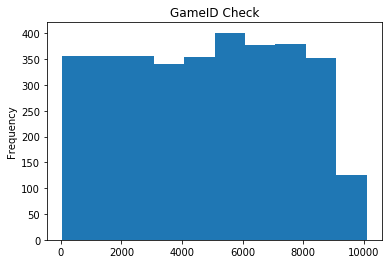

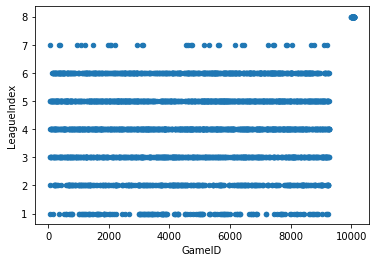

In [11]:
base['GameID'].plot(kind='hist', bins=10, title='GameID Check')
base.plot(kind='scatter', x='GameID', y='LeagueIndex')

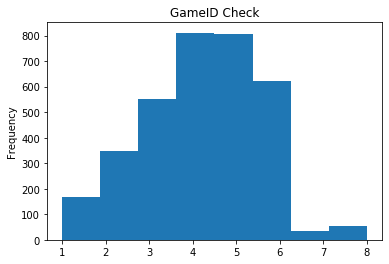

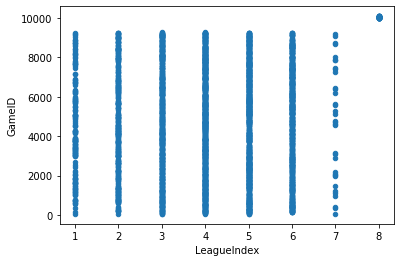

In [16]:
base['LeagueIndex'].plot(kind='hist', bins=8, title='GameID Check')
base.plot(kind='scatter', x='LeagueIndex', y='GameID')

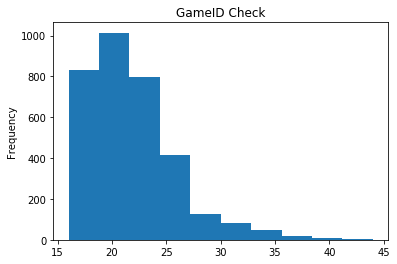

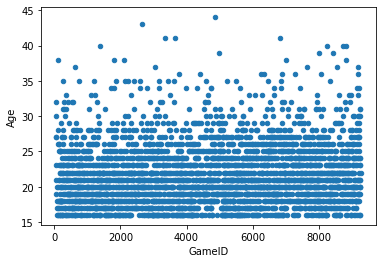

In [17]:
base['Age'].plot(kind='hist', bins=10, title='GameID Check')
base.plot(kind='scatter', x='GameID', y='Age')

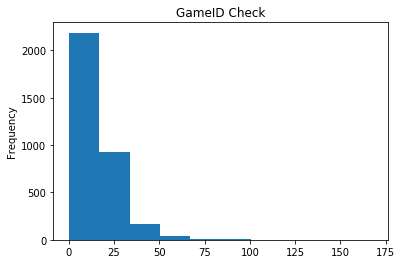

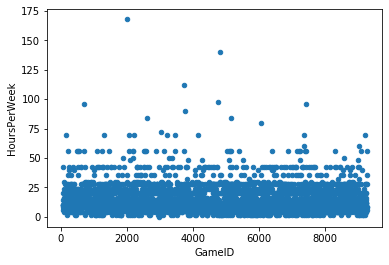

In [18]:
base['HoursPerWeek'].plot(kind='hist', bins=10, title='GameID Check')
base.plot(kind='scatter', x='GameID', y='HoursPerWeek')

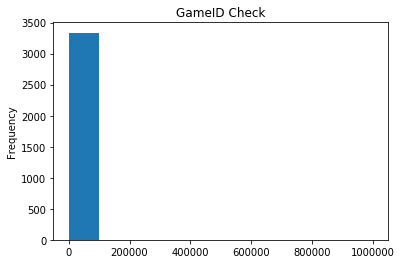

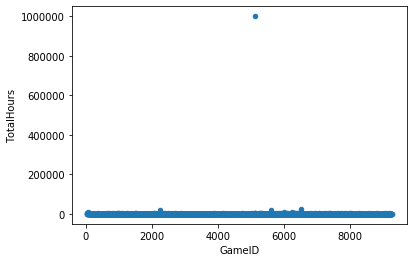

In [19]:
base['TotalHours'].plot(kind='hist', bins=10, title='GameID Check')
base.plot(kind='scatter', x='GameID', y='TotalHours')

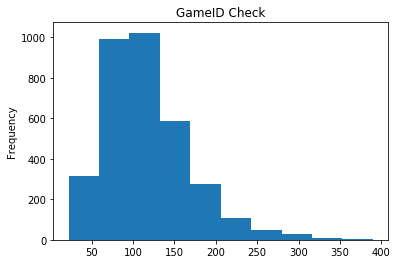

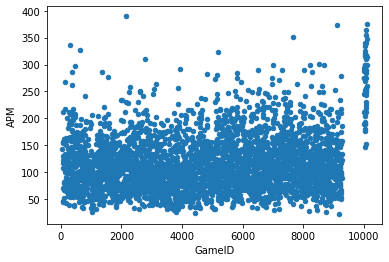

In [20]:
base['APM'].plot(kind='hist', bins=10, title='GameID Check')
base.plot(kind='scatter', x='GameID', y='APM')

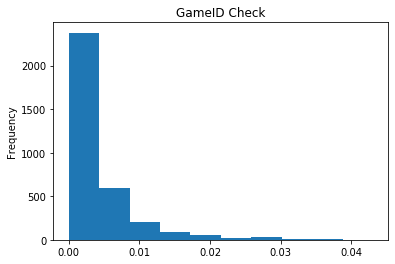

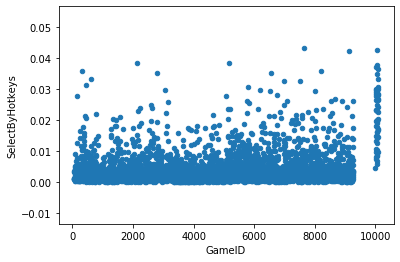

In [21]:
base['SelectByHotkeys'].plot(kind='hist', bins=10, title='GameID Check')
base.plot(kind='scatter', x='GameID', y='SelectByHotkeys')

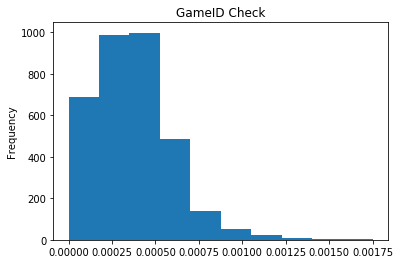

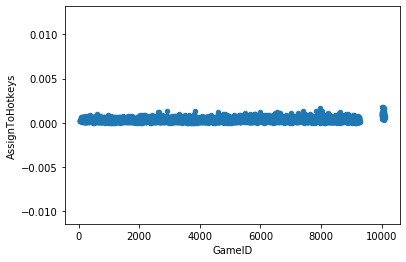

In [22]:
base['AssignToHotkeys'].plot(kind='hist', bins=10, title='GameID Check')
base.plot(kind='scatter', x='GameID', y='AssignToHotkeys')

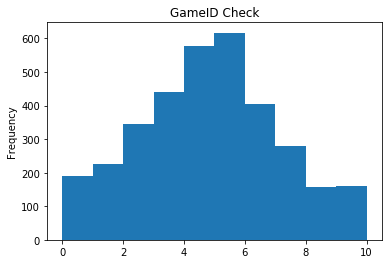

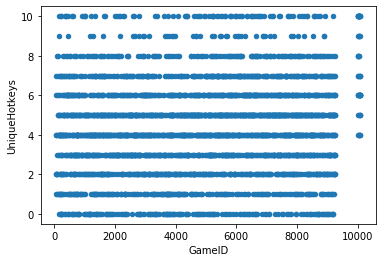

In [23]:
base['UniqueHotkeys'].plot(kind='hist', bins=10, title='GameID Check')
base.plot(kind='scatter', x='GameID', y='UniqueHotkeys')

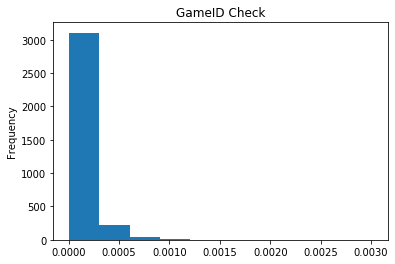

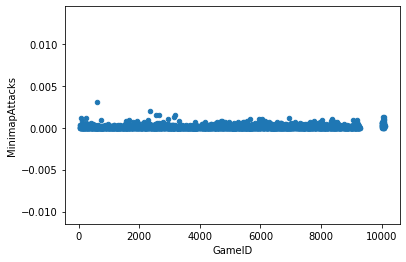

In [24]:
base['MinimapAttacks'].plot(kind='hist', bins=10, title='GameID Check')
base.plot(kind='scatter', x='GameID', y='MinimapAttacks')

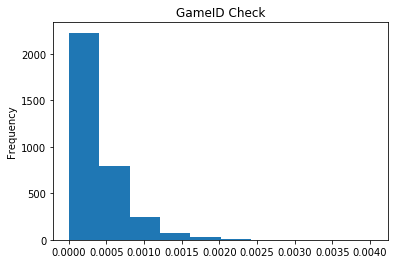

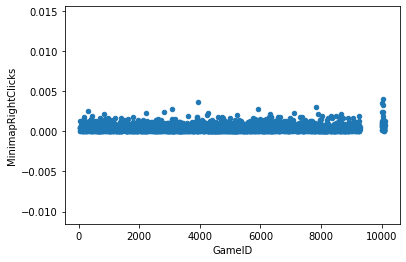

In [25]:
base['MinimapRightClicks'].plot(kind='hist', bins=10, title='GameID Check')
base.plot(kind='scatter', x='GameID', y='MinimapRightClicks')

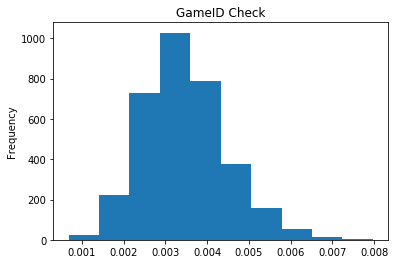

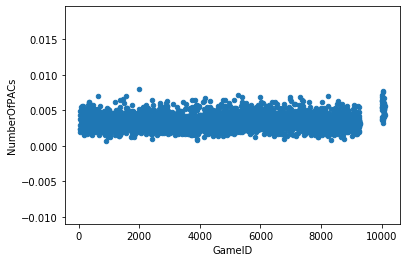

In [26]:
base['NumberOfPACs'].plot(kind='hist', bins=10, title='GameID Check')
base.plot(kind='scatter', x='GameID', y='NumberOfPACs')

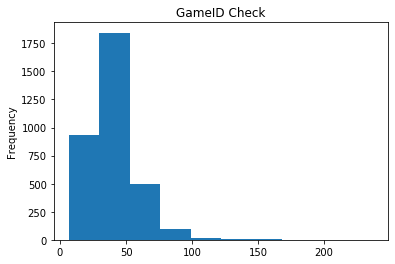

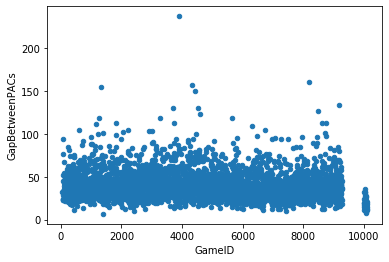

In [27]:
base['GapBetweenPACs'].plot(kind='hist', bins=10, title='GameID Check')
base.plot(kind='scatter', x='GameID', y='GapBetweenPACs')

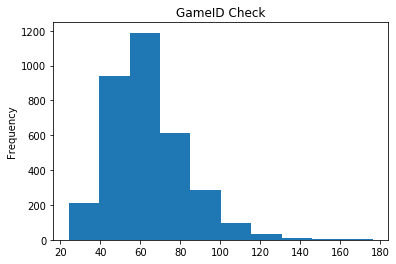

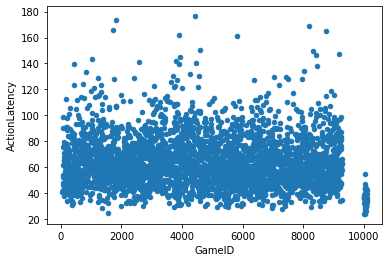

In [28]:
base['ActionLatency'].plot(kind='hist', bins=10, title='GameID Check')
base.plot(kind='scatter', x='GameID', y='ActionLatency')

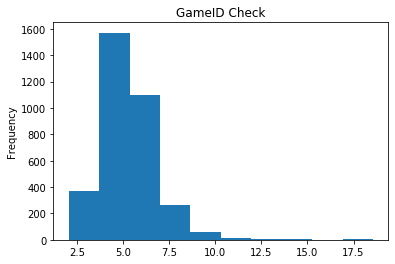

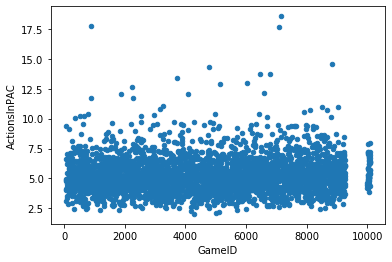

In [29]:
base['ActionsInPAC'].plot(kind='hist', bins=10, title='GameID Check')
base.plot(kind='scatter', x='GameID', y='ActionsInPAC')

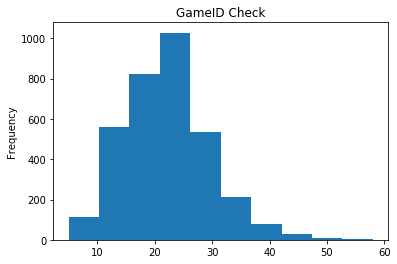

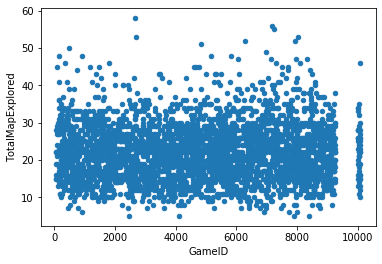

In [30]:
base['TotalMapExplored'].plot(kind='hist', bins=10, title='GameID Check')
base.plot(kind='scatter', x='GameID', y='TotalMapExplored')

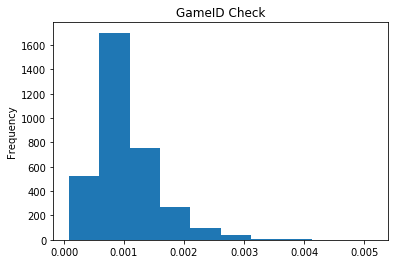

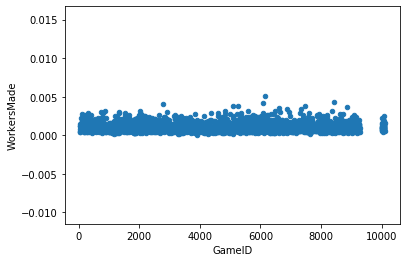

In [31]:
base['WorkersMade'].plot(kind='hist', bins=10, title='GameID Check')
base.plot(kind='scatter', x='GameID', y='WorkersMade')

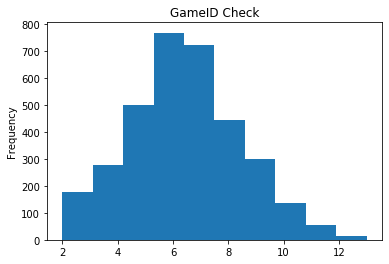

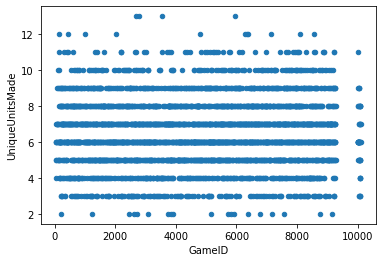

In [32]:
base['UniqueUnitsMade'].plot(kind='hist', bins=10, title='GameID Check')
base.plot(kind='scatter', x='GameID', y='UniqueUnitsMade')

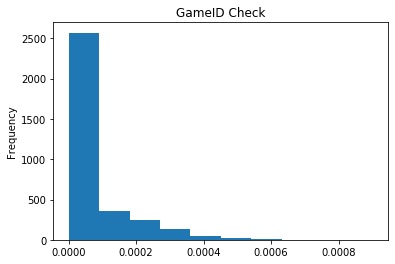

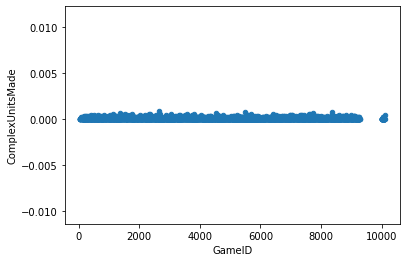

In [33]:
base['ComplexUnitsMade'].plot(kind='hist', bins=10, title='GameID Check')
base.plot(kind='scatter', x='GameID', y='ComplexUnitsMade')

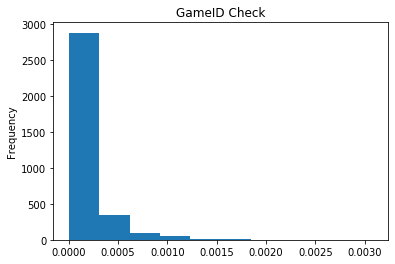

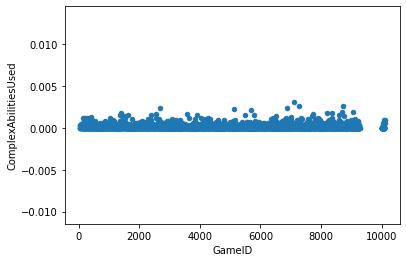

In [34]:
base['ComplexAbilitiesUsed'].plot(kind='hist', bins=10, title='GameID Check')
base.plot(kind='scatter', x='GameID', y='ComplexAbilitiesUsed')

#### Then over the dataset without the NAs (the two NA normals and the pros)

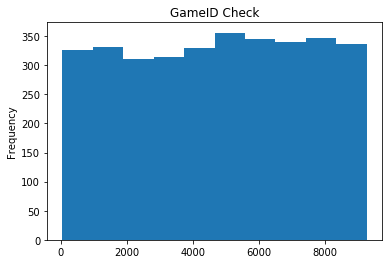

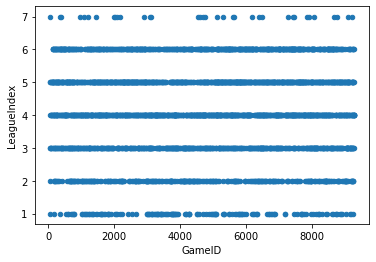

In [35]:
base2['GameID'].plot(kind='hist', bins=10, title='GameID Check')
base2.plot(kind='scatter', x='GameID', y='LeagueIndex')

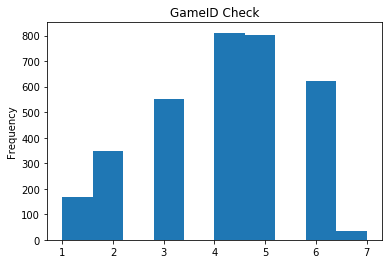

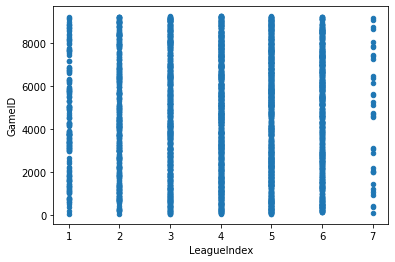

In [36]:
base2['LeagueIndex'].plot(kind='hist', bins=10, title='GameID Check')
base2.plot(kind='scatter', x='LeagueIndex', y='GameID')

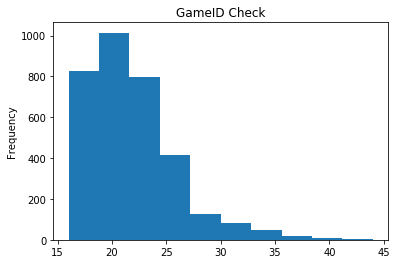

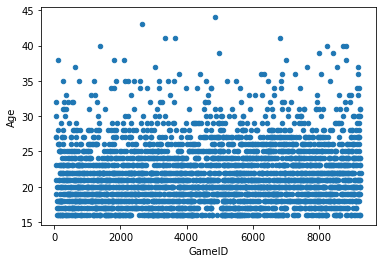

In [37]:
base2['Age'].plot(kind='hist', bins=10, title='GameID Check')
base2.plot(kind='scatter', x='GameID', y='Age')

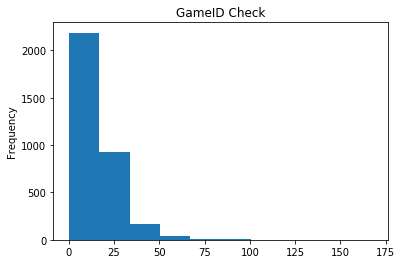

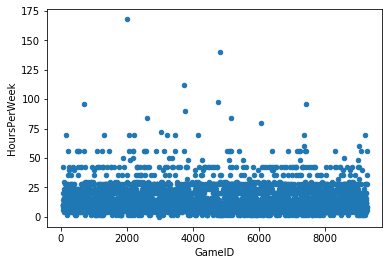

In [38]:
base2['HoursPerWeek'].plot(kind='hist', bins=10, title='GameID Check')
base2.plot(kind='scatter', x='GameID', y='HoursPerWeek')

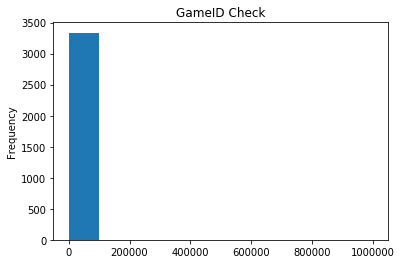

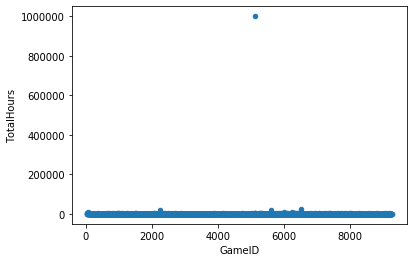

In [39]:
base2['TotalHours'].plot(kind='hist', bins=10, title='GameID Check')
base2.plot(kind='scatter', x='GameID', y='TotalHours')

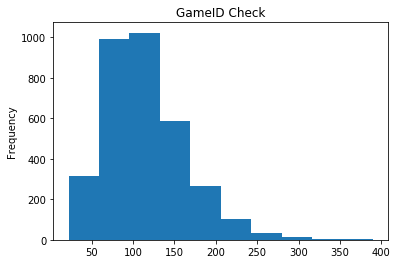

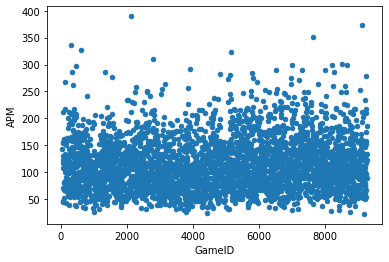

In [40]:
base2['APM'].plot(kind='hist', bins=10, title='GameID Check')
base2.plot(kind='scatter', x='GameID', y='APM')

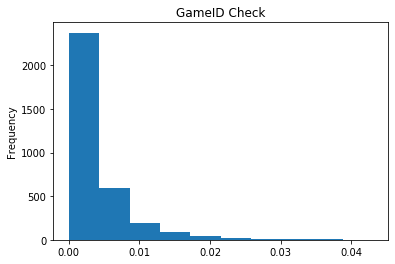

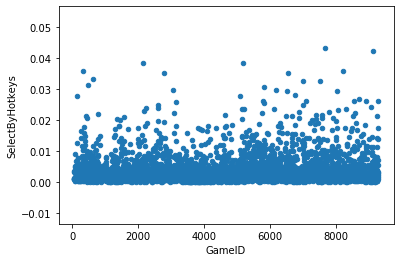

In [41]:
base2['SelectByHotkeys'].plot(kind='hist', bins=10, title='GameID Check')
base2.plot(kind='scatter', x='GameID', y='SelectByHotkeys')

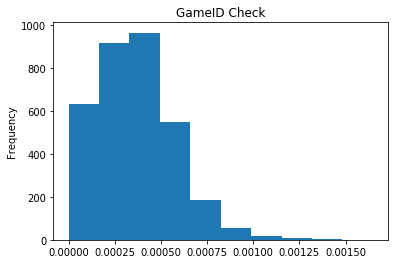

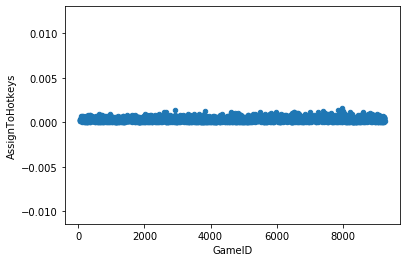

In [42]:
base2['AssignToHotkeys'].plot(kind='hist', bins=10, title='GameID Check')
base2.plot(kind='scatter', x='GameID', y='AssignToHotkeys')

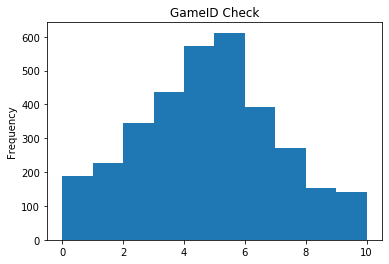

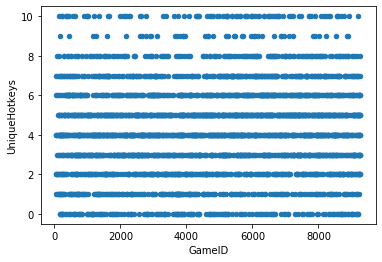

In [43]:
base2['UniqueHotkeys'].plot(kind='hist', bins=10, title='GameID Check')
base2.plot(kind='scatter', x='GameID', y='UniqueHotkeys')

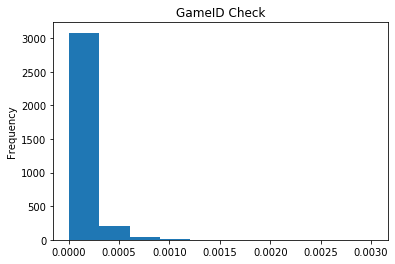

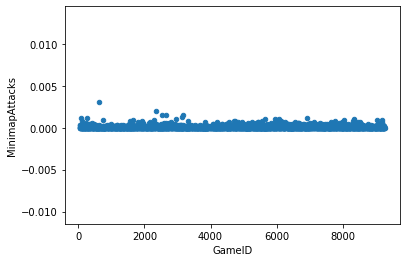

In [44]:
base2['MinimapAttacks'].plot(kind='hist', bins=10, title='GameID Check')
base2.plot(kind='scatter', x='GameID', y='MinimapAttacks')

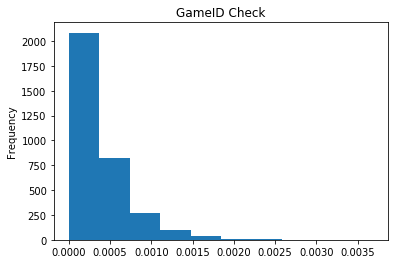

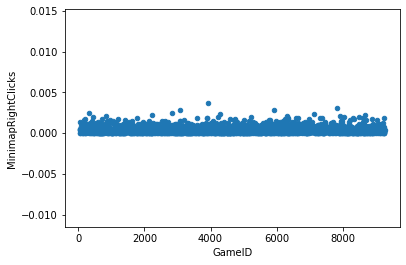

In [45]:
base2['MinimapRightClicks'].plot(kind='hist', bins=10, title='GameID Check')
base2.plot(kind='scatter', x='GameID', y='MinimapRightClicks')

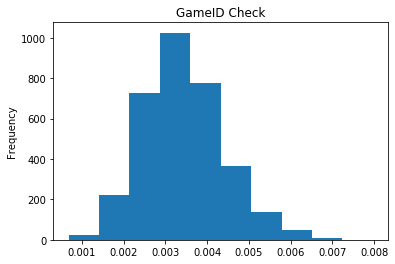

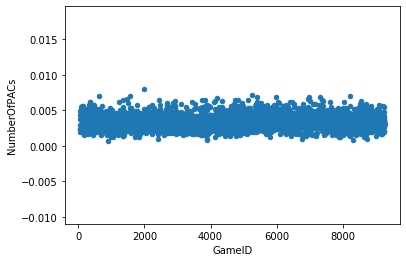

In [46]:
base2['NumberOfPACs'].plot(kind='hist', bins=10, title='GameID Check')
base2.plot(kind='scatter', x='GameID', y='NumberOfPACs')

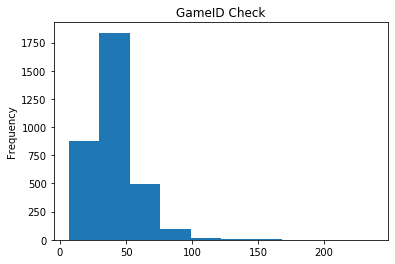

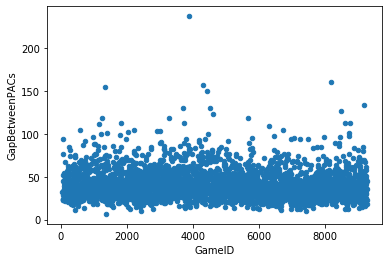

In [47]:
base2['GapBetweenPACs'].plot(kind='hist', bins=10, title='GameID Check')
base2.plot(kind='scatter', x='GameID', y='GapBetweenPACs')

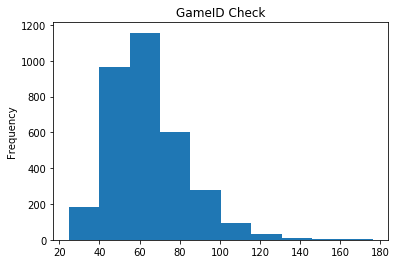

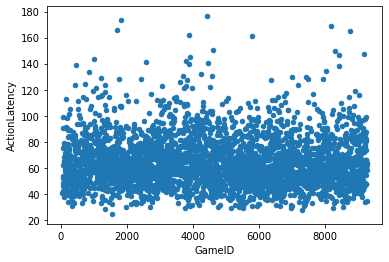

In [48]:
base2['ActionLatency'].plot(kind='hist', bins=10, title='GameID Check')
base2.plot(kind='scatter', x='GameID', y='ActionLatency')

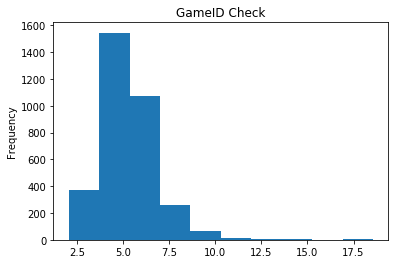

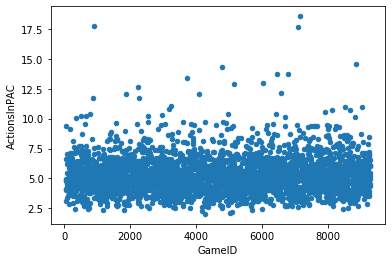

In [49]:
base2['ActionsInPAC'].plot(kind='hist', bins=10, title='GameID Check')
base2.plot(kind='scatter', x='GameID', y='ActionsInPAC')

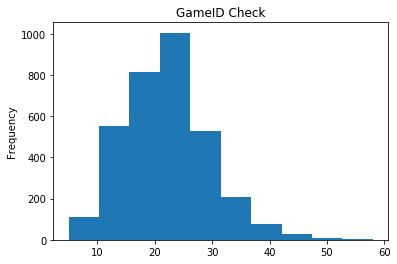

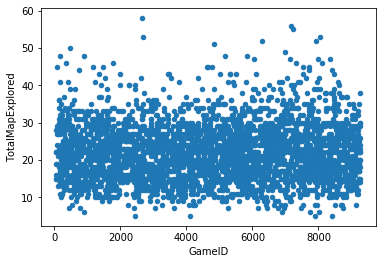

In [50]:
base2['TotalMapExplored'].plot(kind='hist', bins=10, title='GameID Check')
base2.plot(kind='scatter', x='GameID', y='TotalMapExplored')

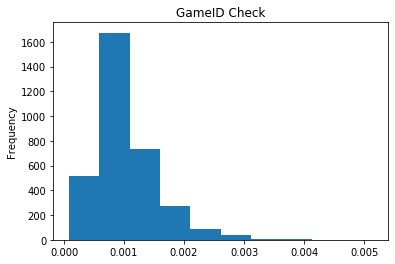

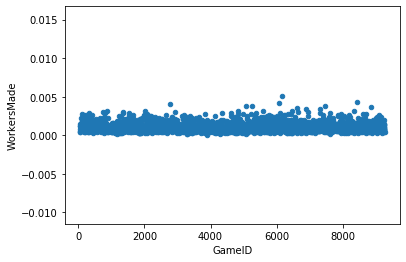

In [51]:
base2['WorkersMade'].plot(kind='hist', bins=10, title='GameID Check')
base2.plot(kind='scatter', x='GameID', y='WorkersMade')

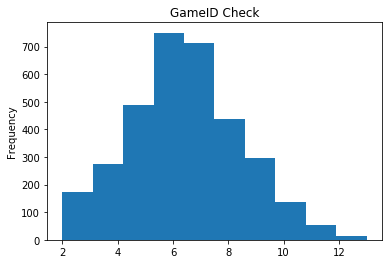

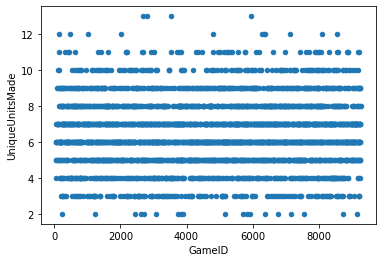

In [52]:
base2['UniqueUnitsMade'].plot(kind='hist', bins=10, title='GameID Check')
base2.plot(kind='scatter', x='GameID', y='UniqueUnitsMade')

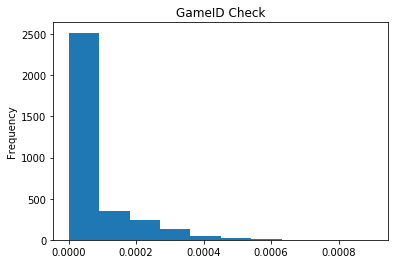

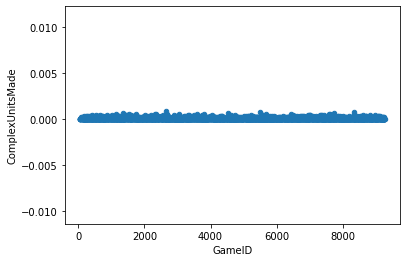

In [53]:
base2['ComplexUnitsMade'].plot(kind='hist', bins=10, title='GameID Check')
base2.plot(kind='scatter', x='GameID', y='ComplexUnitsMade')

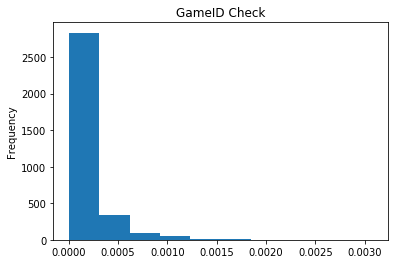

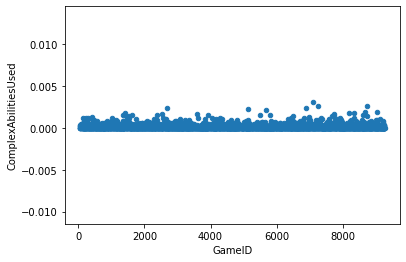

In [54]:
base2['ComplexAbilitiesUsed'].plot(kind='hist', bins=10, title='GameID Check')
base2.plot(kind='scatter', x='GameID', y='ComplexAbilitiesUsed')

## Remove Outliers

In [55]:
#remove the outlier from Total Hours
base3 = base2.set_index('TotalHours')
base3 = base3.drop(1000000, axis=0)
base3 = base3.reset_index()
base3.describe()

,TotalHours,GameID,LeagueIndex,Age,HoursPerWeek,APM,SelectByHotkeys,AssignToHotkeys,UniqueHotkeys,MinimapAttacks,MinimapRightClicks,NumberOfPACs,GapBetweenPACs,ActionLatency,ActionsInPAC,TotalMapExplored,WorkersMade,UniqueUnitsMade,ComplexUnitsMade,ComplexAbilitiesUsed
count,3337.000000,3337.000000,3337.000000,3337.000000,3337.000000,3337.000000,3337.000000,3337.000000,3337.000000,3337.000000,3337.000000,3337.000000,3337.000000,3337.000000,3337.000000,3337.000000,3337.000000,3337.000000,3337.000000,3337.000000
mean,661.039257,4719.426131,4.120467,21.651483,15.907102,114.525764,0.004017,0.000364,4.316152,0.000094,0.000380,0.003433,40.717594,64.218000,5.266780,22.114774,0.001031,6.541205,0.000060,0.000142
std,856.348806,2657.307846,1.448307,4.206512,11.965468,48.032308,0.004715,0.000210,2.333641,0.000159,0.000360,0.000965,17.058352,19.034036,1.500796,7.441036,0.000520,1.859304,0.000112,0.000266
min,3.000000,52.000000,1.000000,16.000000,0.000000,22.059600,0.000000,0.000000,0.000000,0.000000,0.000000,0.000679,6.666700,24.632600,2.038900,5.000000,0.000077,2.000000,0.000000,0.000000
25%,300.000000,2423.000000,3.000000,19.000000,8.000000,79.229400,0.001244,0.000202,3.000000,0.000000,0.000139,0.002743,29.328700,50.929400,4.261500,17.000000,0.000682,5.000000,0.000000,0.000000
50%,500.000000,4787.000000,4.000000,21.000000,12.000000,107.067600,0.002444,0.000349,4.000000,0.000039,0.000278,0.003376,37.060500,61.303300,5.086800,22.000000,0.000904,6.000000,0.000000,0.000020
75%,800.000000,6995.000000,5.000000,24.000000,20.000000,140.090400,0.004938,0.000493,6.000000,0.000114,0.000508,0.004003,48.512000,74.032800,6.027500,27.000000,0.001258,8.000000,0.000087,0.000182
max,25000.000000,9271.000000,7.000000,44.000000,168.000000,389.831400,0.043088,0.001648,10.000000,0.003019,0.003688,0.007971,237.142900,176.372100,18.558100,58.000000,0.005149,13.000000,0.000902,0.003084


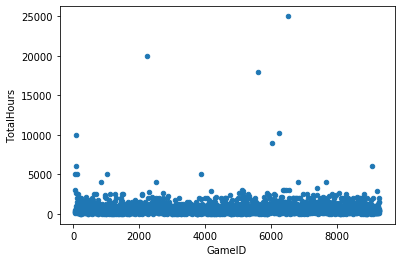

In [56]:
base3.plot(kind='scatter', x='GameID', y='TotalHours')

In [57]:
#remove outlier from Gap Between PACs
base4 = base3.set_index('GapBetweenPACs')
base4 = base4.drop(237.142900, axis=0)
base4 = base4.reset_index()
base4.describe()

,GapBetweenPACs,TotalHours,GameID,LeagueIndex,Age,HoursPerWeek,APM,SelectByHotkeys,AssignToHotkeys,UniqueHotkeys,MinimapAttacks,MinimapRightClicks,NumberOfPACs,ActionLatency,ActionsInPAC,TotalMapExplored,WorkersMade,UniqueUnitsMade,ComplexUnitsMade,ComplexAbilitiesUsed
count,3336.000000,3336.000000,3336.000000,3336.000000,3336.000000,3336.000000,3336.000000,3336.000000,3336.000000,3336.000000,3336.000000,3336.000000,3336.000000,3336.000000,3336.000000,3336.000000,3336.000000,3336.000000,3336.000000,3336.000000
mean,40.658713,661.213429,4719.672062,4.121403,21.653177,15.907074,114.548909,0.004019,0.000364,4.317446,0.000094,0.000380,0.003434,64.188798,5.265933,22.116007,0.001031,6.542566,0.000060,0.000142
std,16.718316,856.418068,2657.668231,1.447516,4.206004,11.967262,48.020894,0.004715,0.000210,2.332794,0.000159,0.000360,0.000964,18.961978,1.500224,7.441810,0.000520,1.857918,0.000112,0.000266
min,6.666700,3.000000,52.000000,1.000000,16.000000,0.000000,22.059600,0.000000,0.000000,0.000000,0.000000,0.000000,0.000679,24.632600,2.038900,5.000000,0.000161,2.000000,0.000000,0.000000
25%,29.328000,300.000000,2422.500000,3.000000,19.000000,8.000000,79.235700,0.001247,0.000202,3.000000,0.000000,0.000139,0.002743,50.915075,4.261350,17.000000,0.000682,5.000000,0.000000,0.000000
50%,37.058900,500.000000,4788.000000,4.000000,21.000000,12.000000,107.070300,0.002445,0.000349,4.000000,0.000039,0.000278,0.003376,61.296100,5.085650,22.000000,0.000904,6.000000,0.000000,0.000021
75%,48.507275,800.000000,6995.250000,5.000000,24.000000,20.000000,140.112300,0.004940,0.000493,6.000000,0.000114,0.000508,0.004003,74.031975,6.027050,27.000000,0.001258,8.000000,0.000087,0.000182
max,160.953500,25000.000000,9271.000000,7.000000,44.000000,168.000000,389.831400,0.043088,0.001648,10.000000,0.003019,0.003688,0.007971,176.372100,18.558100,58.000000,0.005149,13.000000,0.000902,0.003084
